# Predictive ML Project
**Author**: Kiruthikaa NS
**Repo Name**: `datafun-07-ml`
**Date**: June 2025  
**GitHub Repo**: [View this project on GitHub](https://github.com/Kiruthikaa2512/datafun-07-ml/kiru_ml.ipynb)  


In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1 - Chart a Straight Line
In this section, we demonstrate a linear relationship using the equation for converting Celsius to Fahrenheit:

**Fahrenheit = (9/5) × Celsius + 32**

This follows the standard linear form:  
**y = mx + b**, where:  
- *m = 9/5* (the slope)  
- *b = 32* (the y-intercept)

We'll plot Celsius temperatures from 0°C to 90°C in increments of 10, and calculate their corresponding Fahrenheit values using the formula above.

In [177]:
celsius = np.arange(0, 100, 10)
fahrenheit = (9/5) * celsius + 32
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
print(df)


   Celsius  Fahrenheit
0        0        32.0
1       10        50.0
2       20        68.0
3       30        86.0
4       40       104.0
5       50       122.0
6       60       140.0
7       70       158.0
8       80       176.0
9       90       194.0


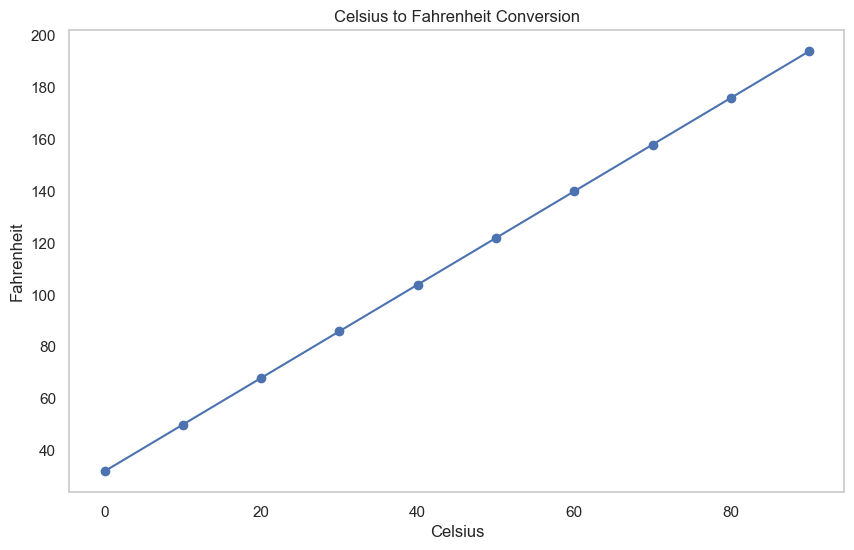

In [178]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='b', label='Fahrenheit')
plt.title('Celsius to Fahrenheit Conversion')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.savefig('output/celsius_to_fahrenheit.png')
plt.show()

### Observation - Line Chart of Celcius to Fahrenheit Conversion

The plotted line shows a consistent upward trend—this reflects the direct linear relationship between Celsius and Fahrenheit temperatures. As Celsius increases by 10°, Fahrenheit increases by 18°, confirming the slope of 9/5.

The line is straight and evenly spaced, validating that temperature conversion between these two units is indeed a **linear transformation**. This reinforces our understanding of how `y = mx + b` models real-world data.

## Part 2 - Prediction.

### Section 1 - Data Acquisition

In [179]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [180]:
print("\n First 5 rows of the NYC DataFrame:")
print(nyc_df.head())
print("\n Last 5 rows of the NYC DataFrame:")
print (nyc_df.tail())


 First 5 rows of the NYC DataFrame:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

 Last 5 rows of the NYC DataFrame:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3: Data Cleaning

In [181]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
# Renaming columns for clarity
nyc_df.rename(columns={'Date': 'Year', 'Value': 'Temperature', 'Anomaly': 'Anomalies'}, inplace=True)
# print the renamed DataFrame
print("\n Renamed NYC DataFrame:")
print(nyc_df.columns)
# Save cleaned data
nyc_df.to_csv("Cleaned_NYC_Jan.csv", index=False)
# Show first 5 rows
print(nyc_df.head())



 Renamed NYC DataFrame:
Index(['Year', 'Temperature', 'Anomalies'], dtype='object')
   Year  Temperature  Anomalies
0  1895         34.2       -3.2
1  1896         34.7       -2.7
2  1897         35.5       -1.9
3  1898         39.6        2.2
4  1899         36.4       -1.0


### Data cleaned: columns renamed, year extracted and the cleaned data has been saved as CSV in the name of Cleaned NYC_Jan.csv

### Section 4: Descriptive Statistics

In [182]:
# Precision setting for better readability
pd.set_option('display.precision', 2)

# Show descriptive statistics for numeric columns only (exclude 'Date')
print("\nDescriptive statistics of the NYC DataFrame:")
print(nyc_df.describe(include=[float, int]))

# Calculate basic descriptive stats for Temperature
mean_temp = nyc_df['Temperature'].mean()
median_temp = nyc_df['Temperature'].median()
std_temp = nyc_df['Temperature'].std()
min_temp = nyc_df['Temperature'].min()
max_temp = nyc_df['Temperature'].max()

print(f"\nTemperature stats: mean={mean_temp:.2f}, median={median_temp:.2f}, std={std_temp:.2f}, min={min_temp:.2f}, max={max_temp:.2f}")



Descriptive statistics of the NYC DataFrame:
          Year  Temperature  Anomalies
count   124.00       124.00     124.00
mean   1956.50        37.60       0.20
std      35.94         4.54       4.54
min    1895.00        26.10     -11.30
25%    1925.75        34.58      -2.82
50%    1956.50        37.60       0.20
75%    1987.25        40.60       3.20
max    2018.00        47.60      10.20

Temperature stats: mean=37.60, median=37.60, std=4.54, min=26.10, max=47.60


### Summary of Descriptive Statistics

This dataset spans 124 years of January average high temperatures in New York City. The average (mean) and median temperature are both 37.60°F, suggesting a relatively symmetrical distribution.

The minimum and maximum temperatures recorded are 26.10°F and 47.60°F, respectively, indicating a moderate spread in the data. The standard deviation is 4.54°F, reflecting some natural variability in winter climate patterns over time.

Anomalies range from -11.30°F to 10.20°F, confirming both colder and warmer deviations from the baseline. These values will help inform the linear regression model we'll build in the next step.

### Section 5 - Build the Model


In [183]:
# Perform linear regression: Temperature as a function of Year
slope, intercept, r_value, p_value, std_err = stats.linregress(nyc_df['Year'], nyc_df['Temperature'])

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Standard Error: {std_err:.4f}")


Slope: 0.0148
Intercept: 8.6950
R-squared: 0.0137
P-value: 1.9587e-01
Standard Error: 0.0114


### Section 6: Predict

In [184]:
year_to_predict = 2024
predicted_temp_2024 = slope * year_to_predict + intercept

print(f"Predicted average high temperature in Jan 2024: {predicted_temp_2024:.2f}")


Predicted average high temperature in Jan 2024: 38.59


### Section 7: Visualizations

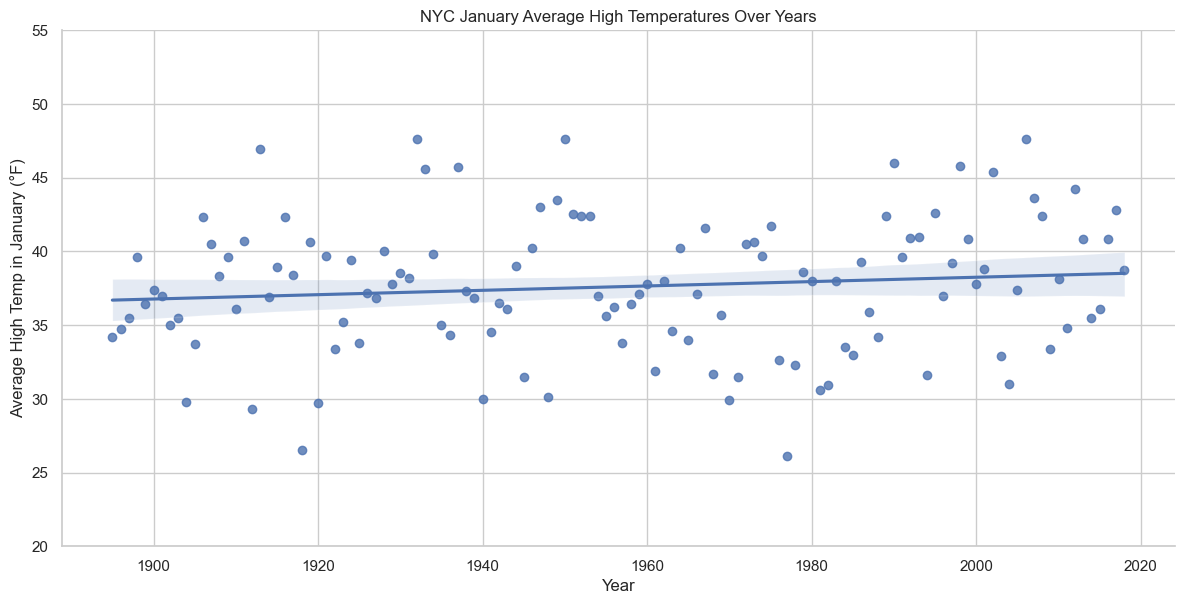

In [185]:
# Create scatter plot with regression line (best fit line)
sns.lmplot(x='Year', y='Temperature', data=nyc_df, aspect=2, height=6)

# Customize axes labels and title
plt.xlabel('Year')
plt.ylabel('Average High Temp in January (°F)')
plt.title('NYC January Average High Temperatures Over Years')
plt.ylim(20, 55)  

plt.show()

## Part 3: Prediction

### Section 1. Build the Model

In [186]:
# Prepare features and target
x=nyc_df[['Year']]
y=nyc_df['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model's coefficients
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.2f}")

Training set shape: (99, 1)
Testing set shape: (25, 1)
Slope (m): 0.0120
Intercept (b): 13.79


### Section 2: Test the Model

In [187]:

# Evaluate model performance using R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared on test set: {r_squared:.4f}")

R-squared on test set: -0.0667


### Section 3: Predict 

In [188]:
# Predict the NYC average high in Jan 2024
future_year = pd.DataFrame([[2024]], columns=['Year'])
predicted_temp = model.predict(future_year)

print(f"Predicted January average high temperature in NYC for 2024: {predicted_temp[0]:.2f}°F")

Predicted January average high temperature in NYC for 2024: 38.11°F


### Section 3: Visualizations

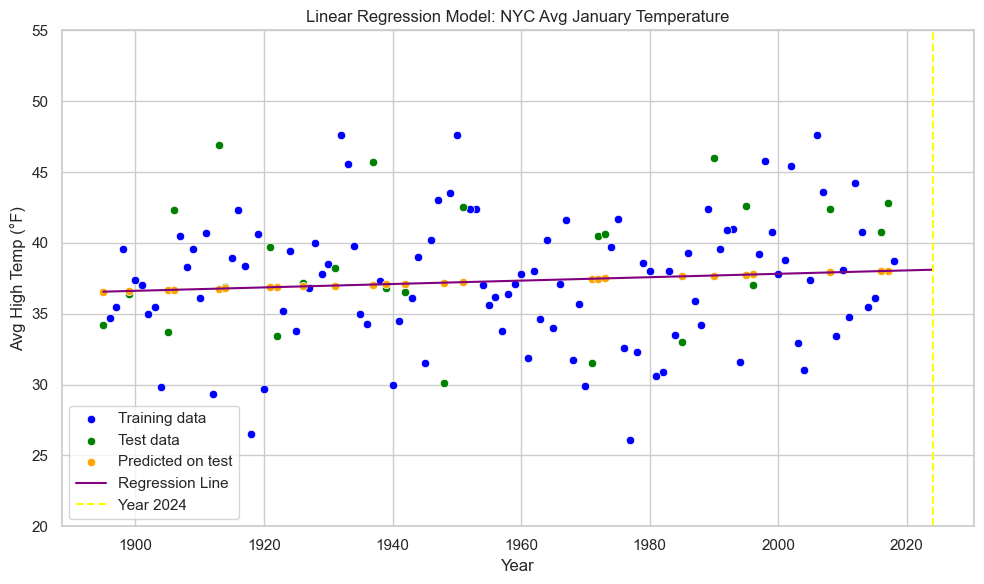

In [192]:
# Predict on the test set
y_pred = model.predict(X_test)

# Set up the figure
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')

# 1. Plot training data
sns.scatterplot(x=X_train['Year'], y=y_train, color='blue', label='Training data')

# 2. Plot test data
sns.scatterplot(x=X_test['Year'], y=y_test, color='green', label='Test data')

# 3. Plot predictions on test data
sns.scatterplot(x=X_test['Year'], y=y_pred, color='orange', label='Predicted on test')

# 4. Regression line across all years + 2024
years_extended = pd.DataFrame(np.linspace(nyc_df['Year'].min(), 2024, 500), columns=['Year'])
predicted_line = model.predict(years_extended)
plt.plot(years_extended['Year'], predicted_line, color='purple', label='Regression Line')

# 5. Highlight prediction year
plt.axvline(x=2024, color='yellow', linestyle='--', label='Year 2024')

# Aesthetics
plt.title('Linear Regression Model: NYC Avg January Temperature')
plt.xlabel('Year')
plt.ylabel('Avg High Temp (°F)')
plt.ylim(20, 55)
plt.legend()
plt.tight_layout()
plt.show()